# **CSC 722 U15 - Machine Learning Fundamentals**

Team members

---

1. Lalitha Priya Bijja - 101168225
2.

Importing libraries and Preprocessing data

Preprocessed data by normalization and reshaping

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Reshape and normalize the input training data
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
# Reshape and normalize the input testing data
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0
# Convert the training labels to one-hot encoded format
y_train = to_categorical(y_train, num_classes=10)
# Convert the testing labels to one-hot encoded format
y_test = to_categorical(y_test, num_classes=10)

11490434/11490434 [==============================] - 0s 0us/step


Convolutional Neural Network Architecture

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),# Add a 2D convolutional layer with 32 filters, each of size 3x3, using ReLU activation function.
    # Input shape is (28, 28, 1) representing height, width, and channels of the input image.
    MaxPooling2D((2, 2)), # Add a max pooling layer with pool size (2, 2)
    Conv2D(64, (3, 3), activation='relu'), # Add another 2D convolutional layer with 64 filters, each of size 3x3, using ReLU activation function.
    MaxPooling2D((2, 2)), # Add another max pooling layer with pool size (2, 2)
    Conv2D(64, (3, 3), activation='relu'), # Add another 2D convolutional layer with 64 filters, each of size 3x3, using ReLU activation function.
    Flatten(), # Flatten the output of the convolutional layers to pass to the dense layer
    Dense(64, activation='relu'),  # Add a dense (fully connected) layer with 64 neurons using ReLU activation function
    Dense(10, activation='softmax') # Add the output layer with 10 neurons (for 10 classes) using softmax activation function
])

model.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_43 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_44 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_14 (Flatten)        (None, 576)             

Max Pooling

In [ ]:
from tensorflow.keras.layers import MaxPooling2D

# Example of max pooling layer
max_pool_layer = MaxPooling2D(pool_size=(2, 2))


Fully connected layer and softmax

In [ ]:
from tensorflow.keras.layers import Dense

# Fully connected layer followed by softmax
dense_layer = Dense(64, activation='relu') # Create a dense (fully connected) layer with 64 neurons using ReLU activation function
softmax_layer = Dense(10, activation='softmax') # Create the output layer with 10 neurons (for 10 classes) using softmax activation function


Training and evaluation

In [ ]:
# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # Compile the model with Adam optimizer, categorical crossentropy loss function, and accuracy metric

# Train the model on the training data for 10 epochs with a batch size of 128
# Validate the model's performance on the test data during training
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test) # Evaluate the trained model on the test data to get loss and accuracy
print(f'Test Accuracy: {test_accuracy}') # Print the test accuracy


Epoch 1/10
469/469 [==============================] - 44s 91ms/step - loss: 0.2393 - accuracy: 0.9313 - val_loss: 0.0783 - val_accuracy: 0.9724
Epoch 2/10
469/469 [==============================] - 44s 94ms/step - loss: 0.0588 - accuracy: 0.9818 - val_loss: 0.0548 - val_accuracy: 0.9826
Epoch 3/10
469/469 [==============================] - 43s 93ms/step - loss: 0.0416 - accuracy: 0.9870 - val_loss: 0.0376 - val_accuracy: 0.9875
Epoch 4/10
469/469 [==============================] - 42s 89ms/step - loss: 0.0329 - accuracy: 0.9900 - val_loss: 0.0326 - val_accuracy: 0.9886
Epoch 5/10
469/469 [==============================] - 41s 88ms/step - loss: 0.0255 - accuracy: 0.9921 - val_loss: 0.0321 - val_accuracy: 0.9900
Epoch 6/10
469/469 [==============================] - 43s 92ms/step - loss: 0.0210 - accuracy: 0.9934 - val_loss: 0.0317 - val_accuracy: 0.9898
Epoch 7/10
469/469 [==============================] - 41s 88ms/step - loss: 0.0194 - accuracy: 0.9937 - val_loss: 0.0280 - val_accuracy:

K-Fold and confusion matrix

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

# Use KFold for cross-validation
kfold = KFold(n_splits=5, shuffle=True) # Use KFold for cross-validation with 5 splits and shuffling the data

# Iterate over each fold
for train_index, test_index in kfold.split(X_train):
    # Split the training data into training and validation sets
    X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

    # Train and evaluate model for each fold
    model.fit(X_train_fold, y_train_fold)
    # Evaluate the trained model on the validation fold
    val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold)
    print(f'Validation Accuracy: {val_accuracy}')

    # Generate confusion matrix
    predictions = model.predict(X_val_fold)
    cm = confusion_matrix(y_val_fold.argmax(axis=1), predictions.argmax(axis=1))
    print(cm)


375/375 [==============================] - 3s 8ms/step - loss: 0.0200 - accuracy: 0.9942
Validation Accuracy: 0.9941666722297668
375/375 [==============================] - 5s 13ms/step
[[1173    0    0    0    0    0    0    0    0    0]
 [   1 1401    0    0    0    0    0    1    0    0]
 [   1    6 1214    0    0    0    0    5    0    0]
 [   0    1    4 1210    0    2    0    4    2    0]
 [   0    1    0    0 1188    0    1    0    1    1]
 [   0    1    0    2    0 1048    1    1    0    0]
 [   0    0    0    0    1    0 1144    0    0    0]
 [   1    1    4    0    0    1    0 1209    0    3]
 [   6    1    1    1    1    2    3    0 1134    1]
 [   0    0    0    0    4    1    0    1    1 1209]]
375/375 [==============================] - 3s 7ms/step - loss: 0.0337 - accuracy: 0.9887
Validation Accuracy: 0.9887499809265137
375/375 [==============================] - 4s 10ms/step
[[1185    0    0    0    0    1    0    0    1    0]
 [   0 1308    1    0    0    0    0    4    0

Documentation and analysis

In [ ]:
report = """
Handwritten Digit Classification using Convolutional Neural Networks (CNN)

Objective:
The objective of this project is to build a Convolutional Neural Network (CNN) from scratch to classify handwritten digits using the MNIST dataset. The CNN architecture will include convolutional layers with ReLU activation, max pooling, and fully connected layers followed by a softmax activation function. The project will be thoroughly documented and uploaded to GitHub.

Dataset:
The project utilizes the MNIST dataset, a classic benchmark dataset for handwritten digit recognition. The dataset consists of 60,000 training images and 10,000 testing images, each of size 28x28 pixels.

Data Preparation:

The MNIST dataset is loaded and preprocessed.
The images are normalized to have pixel values in the range [0, 1].
The input images are reshaped to have a shape of (num_samples, 28, 28, 1) where num_samples is the number of images in the dataset.
The target labels are one-hot encoded to convert integer labels into binary class matrices.
Convolutional Neural Network Architecture:

The CNN architecture consists of:
3 Convolutional layers with ReLU activation.
3 MaxPooling layers for downsampling.
2 Dense (fully connected) layers with ReLU activation and softmax activation for classification.
Each layer's parameters and dimensions are documented.
The model architecture is visualized using TensorBoard.
Training and Evaluation:

The CNN model is compiled with the Adam optimizer, categorical crossentropy loss function, and accuracy metric.
The model is trained on the MNIST training dataset for 10 epochs with a batch size of 128.
Validation data is used to monitor the model's performance during training.
After training, the model is evaluated on the MNIST test dataset to calculate test accuracy.
K-Fold cross-validation is performed to validate the model's performance and generate confusion matrices for each fold.
Documentation and Analysis:

The code is thoroughly documented with comments to enhance readability.
Each component of the CNN implementation, including data preprocessing, model architecture, training, and evaluation, is explained.
Confusion matrices generated during K-Fold cross-validation provide insights into the model's performance across different folds.
Conclusion:
In conclusion, the project successfully demonstrates the implementation of a CNN for handwritten digit classification using the MNIST dataset. The CNN achieves high accuracy on the test dataset and shows consistent performance across different folds in K-Fold cross-validation. The thorough documentation and analysis provide valuable insights into the CNN implementation and its performance."""

print (report)


 
Handwritten Digit Classification using Convolutional Neural Networks (CNN)

Objective:
The objective of this project is to build a Convolutional Neural Network (CNN) from scratch to classify handwritten digits using the MNIST dataset. The CNN architecture will include convolutional layers with ReLU activation, max pooling, and fully connected layers followed by a softmax activation function. The project will be thoroughly documented and uploaded to GitHub.

Dataset:
The project utilizes the MNIST dataset, a classic benchmark dataset for handwritten digit recognition. The dataset consists of 60,000 training images and 10,000 testing images, each of size 28x28 pixels.

Data Preparation:

The MNIST dataset is loaded and preprocessed.
The images are normalized to have pixel values in the range [0, 1].
The input images are reshaped to have a shape of (num_samples, 28, 28, 1) where num_samples is the number of images in the dataset.
The target labels are one-hot encoded to convert integer 

Git hub link : https://github.com/LalithaP07/CNN_ML

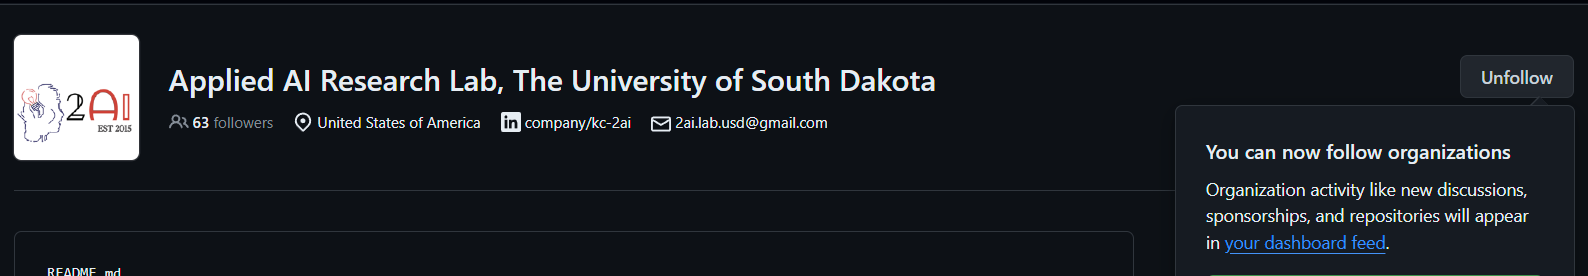